In [1]:
#calling various library
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime



In [2]:
                                                                  # no of points we want in the msd plot
x_arr = np.loadtxt('x_arr_vts_aniso02.txt')                                      #all elements are in micron
y_arr = np.loadtxt('y_arr_vts_aniso02.txt')                                       #all elements are in micron
t_arr = np.loadtxt('dt_arr_vts_aniso02.txt')


In [3]:
dt_min=1e-8                                                                   #initial time step
dt_max=1e4                                                                   #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 40    
timelaglog= np.logspace( np.log10(dt_min), np.log10(1e6), num=N ) #nonzero points for msd plot(distributed linearly in log scale)
counterarray=[]                                                                 #no of data averaging for particular dt


In [4]:
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    count=0                                                                   #counter no of elements for data avraging for particular dt
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       #time difference between i'th and j'th elements
            if timelag >= timelaglog[m] and timelag <= timelaglog[m+1]:
                x = x+((x_arr[j]-x_arr[i])**2)
                y = y+((y_arr[j]-y_arr[i])**2)
                count = count+1
    print('no. of  points in bin',count) 
    x=float(x/count)
    y=float(y/count)
    r=float(x+y) 
    msd_xarr.append(x)
    msd_yarr.append(y)                                                          #msd for a particual dt
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    print( 'tau=', np.sqrt(timelaglog[m]*timelaglog[m+1]) )
    counterarray.append(count)

    
time2=datetime.now().strftime('%Y-%m-%d %H:%M:%S') # final time ending of the run time
print(time1)
print(time2) 

0
no. of  points in bin 844
tau= 1.5117750706156618e-08
1
no. of  points in bin 914
tau= 3.4551072945922184e-08
2
no. of  points in bin 978
tau= 7.896522868499725e-08
3
no. of  points in bin 1004
tau= 1.80472176682717e-07
4
no. of  points in bin 1064
tau= 4.124626382901352e-07
5
no. of  points in bin 1163
tau= 9.426684551178843e-07
6
no. of  points in bin 1232
tau= 2.1544346900318822e-06
7
no. of  points in bin 1317
tau= 4.923882631706742e-06
8
no. of  points in bin 1586
tau= 1.1253355826007658e-05
9
no. of  points in bin 1688
tau= 2.5719138090593443e-05
10
no. of  points in bin 1768
tau= 5.878016072274912e-05
11
no. of  points in bin 1881
tau= 0.00013433993325989
12
no. of  points in bin 2204
tau= 0.00030702906297578496
13
no. of  points in bin 2198
tau= 0.000701703828670383
14
no. of  points in bin 2492
tau= 0.001603718743751331
15
no. of  points in bin 2914
tau= 0.00366524123707963
16
no. of  points in bin 3551
tau= 0.008376776400682915
17
no. of  points in bin 3965
tau= 0.019144819

In [6]:
np.savetxt('msd_x_aniso02_2.txt',msd_xarr)
np.savetxt('msd_y_aniso02_2.txt',msd_yarr)
np.savetxt('msd_r_aniso02_2.txt',msd_rarr)
np.savetxt('t_arr_formsd_aniso02_2.txt',mean_t_arr)
np.savetxt('counterarray_aniso02_2.txt',counterarray)


In [9]:
msd_rarr = np.array(msd_rarr)
msd_xarr = np.array(msd_xarr)
msd_yarr = np.array(msd_yarr)


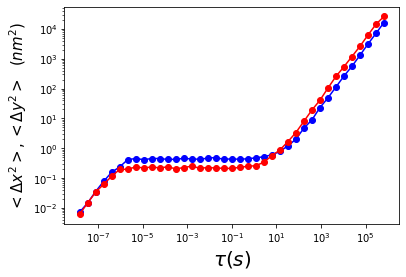

In [10]:


plt.plot(mean_t_arr,msd_xarr*1e18,'bo-')
plt.plot(mean_t_arr,msd_yarr*1e18,'ro-')
plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (nm^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)

plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,6))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-8,6))

plt.xscale('log')
plt.yscale('log')
plt.savefig('mvm_aniso2_x_y_long.png')

plt.show()



In [7]:
import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("mvm_vts_aniso_2.csv", df_a_tp, delimiter=",")